### Vector Operations

#### Vectors are nothing but an one-dimensional data

In any Tabular data, one sample(row) is a vector and also one column is a vector

The below dataframe giving us the number of units sold and its unit price for 5 differnt model mobiles

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=(pd.DataFrame({'Units':[20,5,10,8,2],'Price':[10,25,12,6,4]})).T
data.columns=['M1','M2','M3','M4','M5']
data

,M1,M2,M3,M4,M5
Units,20,5,10,8,2
Price,10,25,12,6,4


In the above dataframe:

Units and Price are row vector

M1, M2, M3, M4 and M5 are column vector

#### We can explore differnt vector transformations on these vectors

In [3]:
# Adding Vectors
# Add M1, M2, M3 , M4 and M5 column vectors
data['M1']+data['M2']+data['M3']+data['M4']+data['M5']

Units    45
Price    57
dtype: int64

Summing up all the column vectors in the above dataframe giving us the total units of product sold and total price.

But total price is not useful in bussiness sense. We can use average price for bussiness inferences.

To find the average price, we need to take a second row vector (price vector) from the dataframe.


In [4]:
data.iloc[1:2] # This also can be accessed as data.loc['Price']

,M1,M2,M3,M4,M5
Price,10,25,12,6,4


In [5]:
print('The average price of the mobiles sold in this shop:')
data.iloc[1:2].mean(axis=1) 
# axis=1 for performing operation column wise. Here each column in this row we need to use for average

The average price of the mobiles sold in this shop:


Price    11.4
dtype: float64

What kind of vector operations we need to use for finding the total sales revenue generated by each mobile model ?

In [6]:
data

,M1,M2,M3,M4,M5
Units,20,5,10,8,2
Price,10,25,12,6,4


Is everyone agree that we need to multiply the elements in each column vector to get answer ?

In numpy and pandas these element wise arithmetic and logical operations will be performed simultanously. No need of looping structures externally.

In [7]:
print('The sales revenue generated by each models are:')
data.loc['Units']*data.loc['Price']

The sales revenue generated by each models are:


M1    200
M2    125
M3    120
M4     48
M5      8
dtype: int64

What kind of vector operations we need to use for finding the total sales revenue generated (including all models)?

Is this can be calculated through 'DOT PRODUCT' ?

In [8]:
print('The total revenue generated by selling all model mobiles:')
np.dot(data.loc['Units'],data.loc['Price'])

The total revenue generated by selling all model mobiles:


501

In [9]:
# The same can also be calculated using the below syntax:
(data.loc['Units']*data.loc['Price']).sum()

501

This shop is planning to give the discount of 10% for the mobile whose price is above 10000 and 5% discount for the mobile whose price is below 5000. 
* How much sales revenue they will get for each model with this discount price
* Howmuch sales revenue they will lose because of discount (if the sales pattern is same as this data)

What kind of vector operations we need to perform to compute the above ?

In [10]:
dis=[]
for i in data.loc['Price']:
    if i>10:
        #print(i,i*0.1)
        dis.append(i-i*0.1)
    else:
        #print(i,i*0.05)
        dis.append(i-i*0.05)  
print('The new discounted prices for models ', list(data.columns), ' are:', dis)

The new discounted prices for models  ['M1', 'M2', 'M3', 'M4', 'M5']  are: [9.5, 22.5, 10.8, 5.7, 3.8]


Apply your python skill and do the above using LIST COMPREHENSION

In [11]:
# Include this discounted price as one new row vector in the data
data=data.T
data['Discount']=dis
data

,Units,Price,Discount
M1,20,10,9.5
M2,5,25,22.5
M3,10,12,10.8
M4,8,6,5.7
M5,2,4,3.8


In [12]:
data=data.T

In [13]:
data

,M1,M2,M3,M4,M5
Units,20.0,5.0,10.0,8.0,2.0
Price,10.0,25.0,12.0,6.0,4.0
Discount,9.5,22.5,10.8,5.7,3.8


In [14]:
# Sales revenue generated after discount
data.loc['Units']*data.loc['Discount']

M1    190.0
M2    112.5
M3    108.0
M4     45.6
M5      7.6
dtype: float64

In [15]:
# Total revenue with discount
(data.loc['Units']*data.loc['Discount']).sum()

463.70000000000005

In [16]:
# Revenue lost because of discount
(data.loc['Units']*data.loc['Price']).sum()-(data.loc['Units']*data.loc['Discount']).sum()

37.299999999999955

#### It is not just tabular data rows and columns are vector, even what we speak is vector

In [17]:
#!pip install sounddevice
import sounddevice as sd

In [18]:
#recording the 10 seconds of speech signal. Whatever I am speaking now will get saved in 'my_record' variable
duration=10
fs=8000  #44000Hhz
my_record=sd.rec(fs*duration,samplerate=fs,channels=1)
sd.wait()
#Speak while running this cell, so whatever u speak will get stored in my_record variable

In [19]:
type(my_record) #my voice signal become numpy array

numpy.ndarray

In [21]:
my_record.shape # 800000 numbers are stored to represent my 10 second speech signal
#This is one dimensional vector (column vector)

(80000, 1)

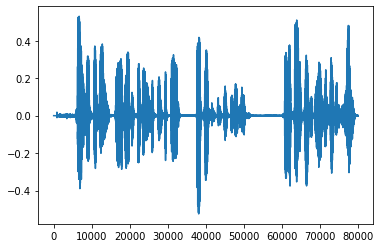

In [22]:
#Visualization speech vector
from matplotlib import pyplot as plt
plt.plot(my_record)

In [29]:
# Hear the vector
sd.play(my_record,fs)

In [24]:
#Take first 32000 samples (numbers) from the my_record variabel
my_record1=my_record[:32000]

In [25]:
sd.play(my_record1,fs)

Simple vector indexing is audio_cutter application !!!!!!

In [26]:
#Clone the voice vector 
sd.play(my_record,6000)

In [27]:
#Clone the voice vector 
sd.play(my_record,12000)

In [30]:
# Amplifying the speech signal through simple vector multiplication with scaler
my_record2=my_record*4
sd.play(my_record2,8000)

Can you hear the amplified voice ? We have amplified the speech signal without any tansistors and electronics circuits , but by multiplying a scaler with vector !!!!!!!!!!!!!!!

#### Lets play some Music 
##### Technically Music is an Vector !!!!!!!

In [31]:
from scipy.io import wavfile
fs, drum = wavfile.read('drums.wav')

In [32]:
fs # samples per second

44100

In [33]:
len(drum)

4725975

In [34]:
len(drum)/fs # Duration of the drum signal in seconds

107.16496598639456

In [35]:
#Let take only 30 seconds of drum signal (Vector Indexing)
drum1=drum[0:30*fs]

In [36]:
len(drum1)/fs

30.0

In [37]:
sd.play(drum1,fs)

In [38]:
ramp=np.linspace(0,1,len(drum1))

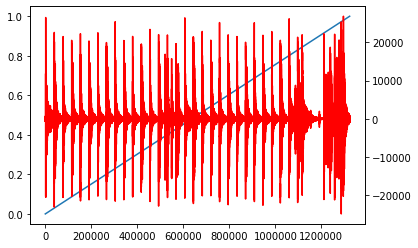

In [43]:
fig,ax1=plt.subplots()
ax1.plot(ramp,)
ax2=ax1.twinx()
ax2.plot(drum1,color='red')

In [55]:
ramp_drum=(drum1*ramp).astype('int16')

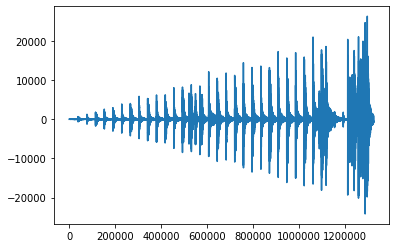

In [56]:
plt.plot(ramp_drum)

#### Lets hear the vector composed beat !!!!


In [57]:
sd.play(ramp_drum,fs)

#### Mix the Drum vector with Guitar vector

In [60]:
fs,guit=wavfile.read('guitar.wav')

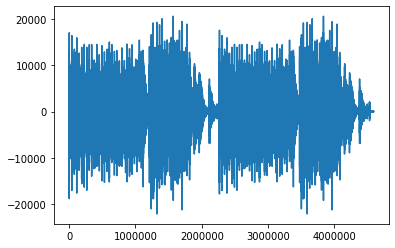

In [61]:
plt.plot(guit)

In [63]:
fs,len(guit)

(44100, 4593084)

In [65]:
#Take only vector corresponds to  30 second music
guit1=guit[0:30*fs]

In [69]:
new_music=drum1+guit1

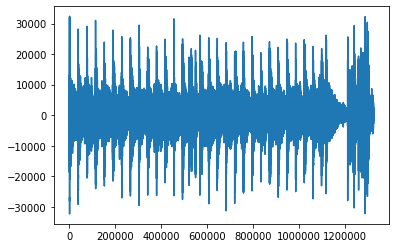

In [70]:
plt.plot(new_music)

In [71]:
sd.play(new_music,fs)

In [72]:
#Reduce the effect the guitar

In [76]:
new_music1=drum1+(0.7*guit1).astype('int16')

In [77]:
sd.play(new_music1,fs)